# Cleaning Residentials Data
[Data Source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/N3HGRN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Data source location
files = glob.glob('./household_power_consumption/dataverse_files/Residential_*.csv')

# split dataset in different dataframes
# each file is a residential
residentials = [pd.read_csv(f, sep=',', low_memory=False) for f in files]

print('Amount of different files: ' + str(len(residentials)))

Amount of different files: 28


In [3]:
residentials[0].head()

,date,hour,energy_kWh
0,2015-05-01,0,0.35
1,2015-05-01,1,0.32
2,2015-05-01,2,0.31
3,2015-05-01,3,0.33
4,2015-05-01,4,0.30


In [4]:
total = 0

for residential in residentials:
    total += len(residential)
    
print("Amount of rows: " + str(total))
print("Amount of columns: " + str(len(residentials[0].columns)))

Amount of rows: 616055
Amount of columns: 3


In [5]:
residentials[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24673 entries, 0 to 24672
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        24673 non-null  object 
 1   hour        24673 non-null  int64  
 2   energy_kWh  24564 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 578.4+ KB


In [6]:
# convert date to datetime type
for residential in residentials:
    residential['date'] = pd.to_datetime(residential['date'])
    
residentials[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24673 entries, 0 to 24672
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        24673 non-null  datetime64[ns]
 1   hour        24673 non-null  int64         
 2   energy_kWh  24564 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 578.4 KB


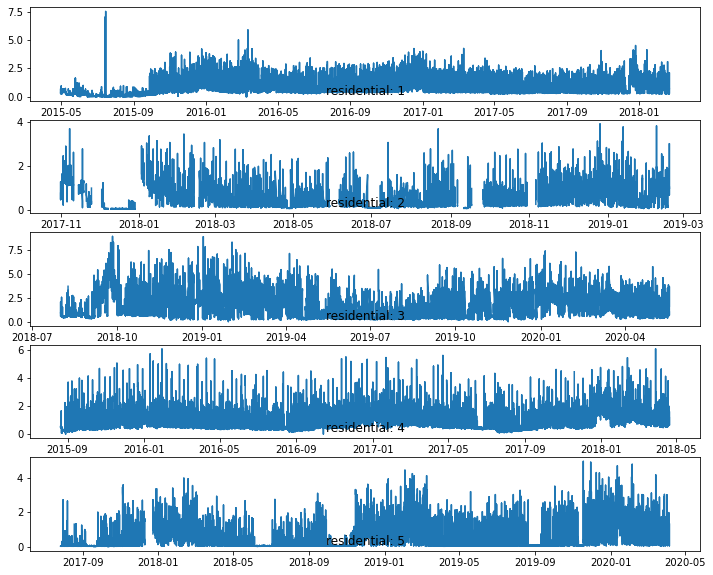

In [7]:
plt.figure(figsize=(12,10))

# visualise data per day for 5 household
for x in range(5):
    ax = plt.subplot(5, 1, 1+x)
    plt.plot(residentials[x]['date'], residentials[x]['energy_kWh'])
    plt.title('residential: '+str(x+1), y=0)
plt.show()

# some missing data for the residentials

In [8]:
total = 0

for residential in residentials:
    total += residential['energy_kWh'].isnull().sum()

print(f'Total missing values: {total}')

Total missing values: 5037


In [9]:
total = 0

# drop rows with null values
for residential in residentials:
    residential.dropna(subset=['energy_kWh'], inplace=True)
    total += len(residential)
    
print("Amount of rows: " + str(total))

Amount of rows: 611018


In [10]:
# convert hour int to timestamp
for residential in residentials:
    res = pd.to_datetime(residential['hour'], format='%H')
    residential['Time'] = res.dt.time
    
residentials[0].head()

,date,hour,energy_kWh,Time
0,2015-05-01,0,0.35,00:00:00
1,2015-05-01,1,0.32,01:00:00
2,2015-05-01,2,0.31,02:00:00
3,2015-05-01,3,0.33,03:00:00
4,2015-05-01,4,0.30,04:00:00


In [15]:
import random

# every household in Metro Vancouver area or Vancouver Island in British Columbia
# latitude range: 48.943754, 50.339788
# lonitude range: -122.119014, -126.587438

for residential in residentials:
    # add latitude and longitude column with random place in the area
    residential["Latitude"] = round(random.uniform(48.943754, 50.339788), 6)
    residential["Longitude"] = round(random.uniform(-122.119014, -126.587438), 6)

residentials[0].head()

,date,hour,energy_kWh,Time,Latitude,Longitude
0,2015-05-01,0,0.35,00:00:00,49.908195,-122.707454
1,2015-05-01,1,0.32,01:00:00,49.908195,-122.707454
2,2015-05-01,2,0.31,02:00:00,49.908195,-122.707454
3,2015-05-01,3,0.33,03:00:00,49.908195,-122.707454
4,2015-05-01,4,0.30,04:00:00,49.908195,-122.707454


In [17]:
# create new dataframe and reformat the data
residentials_filtered = []

for residential in residentials:
    residential.rename(columns={'date':'Date', 'energy_kWh':'Global_active_power'}, inplace=True)

    res_filtered = residential[['Date', 'Time', 'Latitude', 'Longitude', 'Global_active_power']]

    res_filtered.insert(4,'House_or_apartment', 0) # 0 house, 1 apartment
    res_filtered.insert(5,'Area_of_residence', 0) # to be inserted in meters squared
    res_filtered.insert(6,'House_is_isolated', 0) # 0 no, 1 yes
    res_filtered.insert(7,'Number_of_residents', 0) # to be an unsigned number
    res_filtered.insert(8,'Heating_type', 0) # 0 electrical, 1 gas
    res_filtered.insert(9,'Solar_panels', 0) # 0 don't use, 1 use
    residentials_filtered.append(res_filtered)

residentials_filtered[0].head()

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_is_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,2015-05-01,00:00:00,49.908195,-122.707454,0,0,0,0,0,0,0.35
1,2015-05-01,01:00:00,49.908195,-122.707454,0,0,0,0,0,0,0.32
2,2015-05-01,02:00:00,49.908195,-122.707454,0,0,0,0,0,0,0.31
3,2015-05-01,03:00:00,49.908195,-122.707454,0,0,0,0,0,0,0.33
4,2015-05-01,04:00:00,49.908195,-122.707454,0,0,0,0,0,0,0.30


In [20]:
df = pd.concat(residentials_filtered)
df.to_csv('./household_power_consumption/residentials_filtered.csv')